In [81]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras import backend as K

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [82]:
def simple_threshold(im, threshold=.5):
    return ((im > threshold)).astype("float32")

In [83]:
batch_size = 128
epochs = 4
img_rows, img_cols = 28, 28

depth = 64+64+64+64
dim = 7

In [84]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

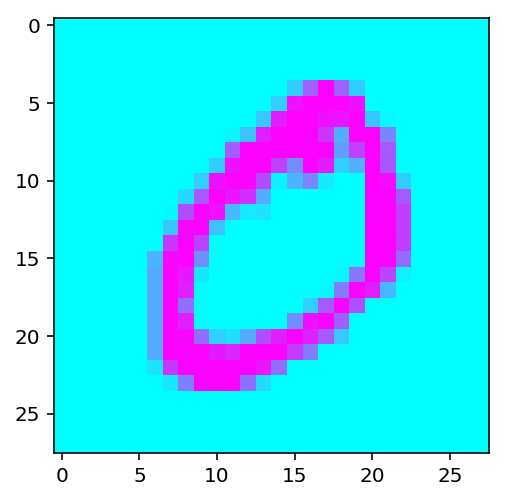

In [85]:
plt.imshow(x_train[1], cmap="cool")

In [86]:
x_train[1].shape

(28, 28)

In [87]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [88]:
print('input_shape =', input_shape)
print('x_train.shape =', x_train.shape)
print('x_test.shape =', x_test.shape)

input_shape = (28, 28, 1)
x_train.shape = (60000, 28, 28, 1)
x_test.shape = (10000, 28, 28, 1)


In [89]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [90]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='sigmoid',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
# ----------------------------------------
model.add(Dense(2, activation='sigmoid'))
# ----------------------------------------
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(6272, activation='sigmoid'))
model.add(Reshape((7, 7, 128)))
model.add(UpSampling2D())
model.add(Conv2D(64, kernel_size=3, activation='sigmoid'))
model.add(UpSampling2D())
model.add(Conv2D(16, (3, 3), activation='sigmoid'))
model.add(UpSampling2D())
model.add(Conv2D(1, (17, 17), activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_104 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_136 (Dense)            (None, 128)               1179776   
_________________________________________________________________
dense_137 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_138 (Dense)            (None, 2)                 130       
__________

In [91]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

In [92]:
history = model.fit(x_train, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 1229s 20ms/step - loss: 0.0827 - acc: 0.8070 - val_loss: 0.0685 - val_acc: 0.8072
Epoch 2/4
51200/60000 [========================>.....] - ETA: 2:53 - loss: 0.0675 - acc: 0.8073

KeyboardInterrupt: 

In [93]:
pred = model.predict(x_train)

In [94]:
def make_visible_img(float_matrix):
    return (float_matrix*255).astype(int).reshape(28, 28)

In [95]:
make_visible_img(x_train[1])[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
       179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
         0,   0])

In [96]:
x_train[1][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.1882353 ],
       [0.93333334],
       [0.9882353 ],
       [0.9882353 ],
       [0.7019608 ],
       [0.04705882],
       [0.29411766],
       [0.4745098 ],
       [0.08235294],
       [0.        ],
       [0.        ],
       [0.99215686],
       [0.9529412 ],
       [0.19607843],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

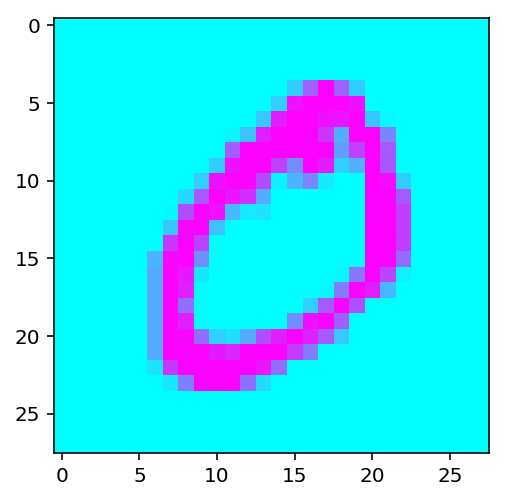

In [97]:
plt.imshow(make_visible_img(x_train[1]),cmap="cool")

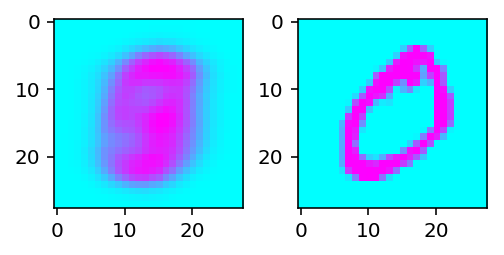

In [100]:
k = 1
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(4, 1,1)
plt.imshow(make_visible_img(x_train[k]),cmap="cool")
fig.add_subplot(4, 2,1)
plt.imshow(make_visible_img(pred[k]),cmap="cool")
plt.show()

In [19]:
from keras import backend as K
get_image = K.function([model.layers[5].input, K.learning_phase()],
                           [model.layers[-1].output])

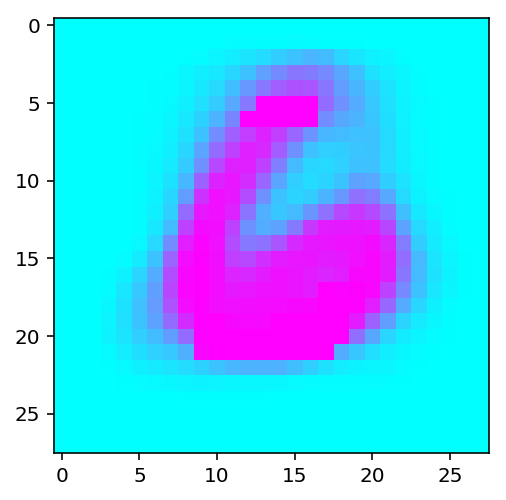

In [82]:
vector = np.array([0.8, .3]).reshape(1,2)
h1 = get_image([vector])[0]
plt.imshow(h1.reshape(28, 28), cmap="cool")

In [57]:
images = [0]*10
vectors = [0]*10
for i in range(10):
    images[i] = [0]*10
    vectors[i] = [0]*10
for f in range(10):
    for j in range(10):
        vectors[f][j] = np.array([f/10, j/10])
        images[f][j] = get_image([vectors[f][j].reshape(-1,2)])[0].reshape(28, 28)

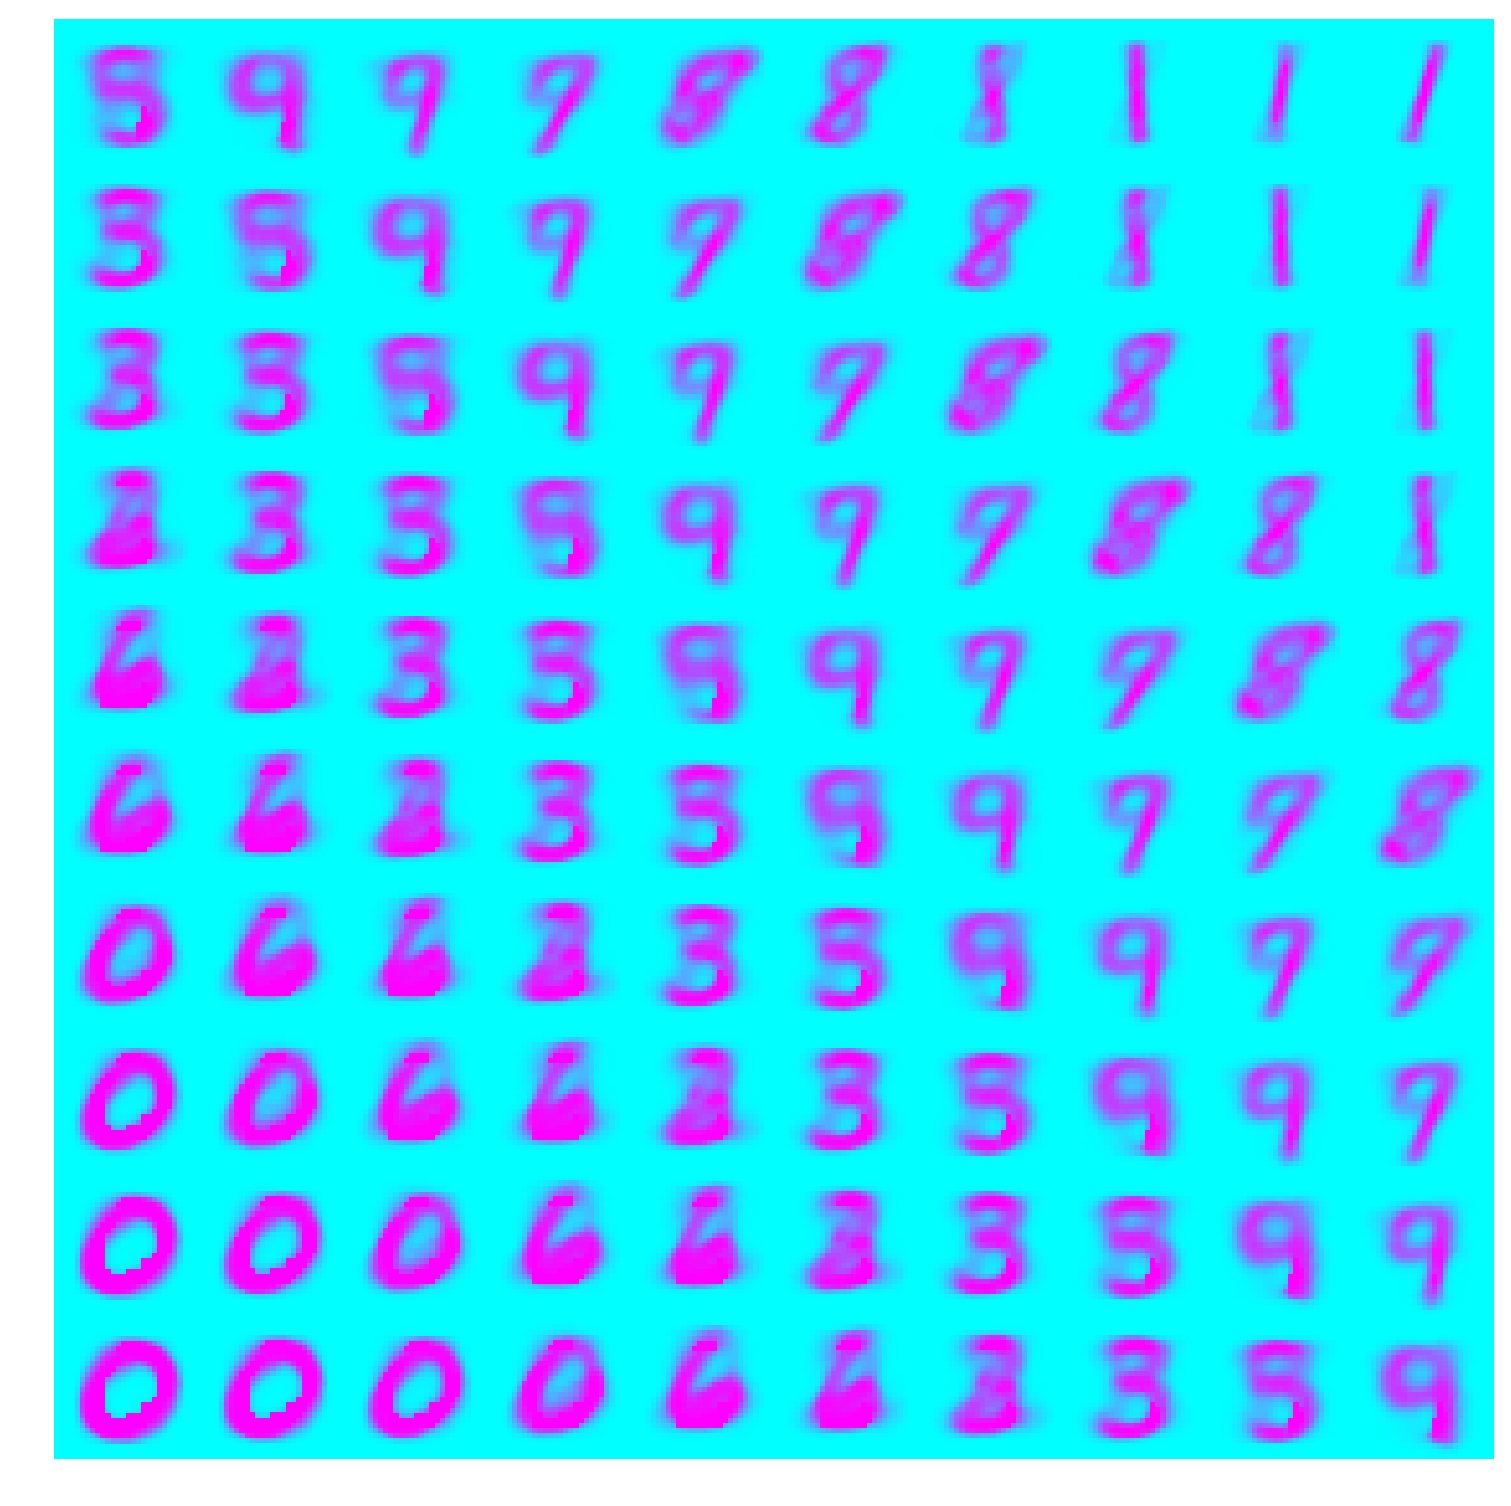

In [81]:
nrow = 10
ncol = 10

fig = plt.figure(figsize=(ncol+1, nrow+1)) 

gs = gridspec.GridSpec(nrow, ncol,
         wspace=0.0, hspace=0.0, 
         top=1.-0.5/(nrow+1), bottom=0.5/(nrow+1), 
         left=0.5/(ncol+1), right=1-0.5/(ncol+1)) 

for i in range(nrow):
    for j in range(ncol):
        im = images[i][j]
        ax= plt.subplot(gs[i,j])
        ax.imshow(im, cmap='cool')
        plt.axis('off')

plt.show()